In [1]:
import cv2
import numpy as np

# TP11

In [2]:

#BLEU
low = np.array([95,80,60])

high = np.array([115,255,150])

# ROSE
low = np.array([120,30,60])

high = np.array([160,110,255])


In [3]:
def detect_inrange(image,low,high,min,max):
    points = []

    image = cv2.blur(image,(5,5))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(image,low,high)
    elements = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
    elements = sorted(elements,key=lambda x:cv2.contourArea(x),reverse=True)

    for elem in elements:
        if cv2.contourArea(elem) < max and min < cv2.contourArea(elem):
            ((x,y),rayon) = cv2.minEnclosingCircle(elem)

            points.append([int(x),int(y),int(rayon),int(cv2.contourArea(elem))])

    return image,mask,points      

In [4]:
from math import sqrt


def pixelize(image,blocks=100):
    block_width = image.shape[1] // blocks
    block_height = image.shape[0] // blocks
    # Create a list to store the blocks
    pixels = []

    # Iterate over the matrix in steps of block_size
    for i in range(0, len(image), block_height):
        for j in range(0, len(image[i]), block_width):
            layer = ()
            # Extract the block
            for k in range(0,len(image[i][j])):
                
                block = image[i:i+block_height, j:j+block_width,k]
                # Convert the block to a 1D list
                block_list = block.flatten().tolist()

                result = sum(block_list) / (block_height*block_width)
                layer = layer + (result,)

            pixels.append(layer)

    img = np.zeros((blocks,blocks,len(image[i][j])),dtype=np.uint8)
    
    for i in range(blocks):
        for j in range(blocks):
            img[i,j] = pixels[(i*blocks)+j]
    return img

In [5]:



img = cv2.imread("TP.jpg",cv2.IMREAD_COLOR)
if img is None:
    print("Erreur chargement de l'image")
    exit(0)

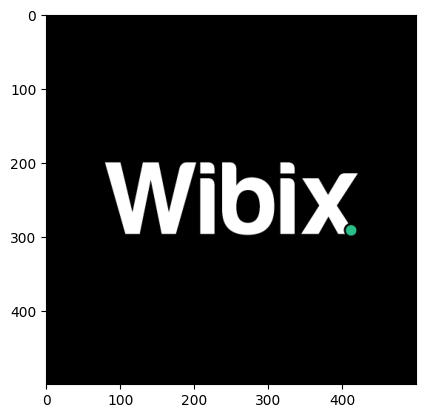

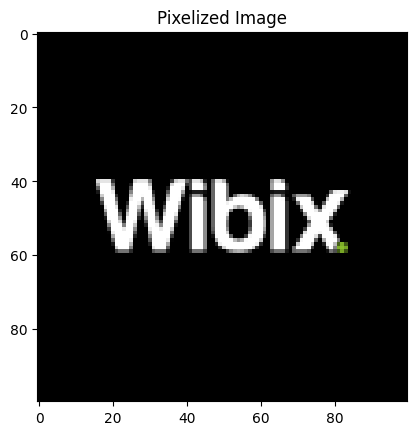

(100, 100, 3)

In [6]:
from matplotlib import pyplot as plt

plt.imshow(img)
plt.show()
# Display the pixelized image
pixelized_image = pixelize(img,blocks=100)
pixelized_image = cv2.cvtColor(pixelized_image, cv2.COLOR_RGB2BGR)  # Assuming RGB format

plt.imshow(pixelized_image)
cv2.waitKey(0)
plt.title('Pixelized Image')
plt.show()

pixelized_image.shape

In [7]:
cap = cv2.VideoCapture(0)
fw,fh = int(cap.get(3)),int(cap.get(4))
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 400.0)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 400.0)

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH),cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

frame_count = 0
fps_start_time = cv2.getTickCount()
if not cap.isOpened():
    print("erreur")
    exit(0)

while cap.isOpened():
    ret,frame = cap.read()
    
    if not ret :
        print("erreur cap.reead")
    frame = frame[0:400,0:400]
    image = pixelize(frame,blocks=100)

    cv2.imshow("cam",image)
    # Increment frame count
    frame_count += 1

    # Calculate FPS every second
    if cv2.getTickCount() - fps_start_time > cv2.getTickFrequency():
        fps = frame_count / ((cv2.getTickCount() - fps_start_time) / cv2.getTickFrequency())
        print(f'FPS: {fps:.2f}')
        frame_count = 0
        fps_start_time = cv2.getTickCount()

    if cv2.waitKey(200) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)

for i in range(10):
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    print(width,height)
    cap.read()
cap.release()

640.0 480.0
640.0 480.0
640.0 480.0
640.0 480.0
640.0 480.0
640.0 480.0
640.0 480.0
640.0 480.0
640.0 480.0
640.0 480.0
